In [16]:
import math, copy
import numpy as np
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [22]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430, 630, 730])
# x_train = np.array([1.0, 2.0])   #features
# y_train = np.array([500.0, 800.0])

In [23]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
    
    return total_cost

In [24]:
def compute_gradient(x, y, w, b):
    m = x.shape[0] 
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_it = (f_wb - y[i]) * x[i]
        dj_db_it = (f_wb - y[i]) 
        dj_dw += dj_dw_it
        dj_db += dj_db_it
    dj_dw = dj_dw /m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

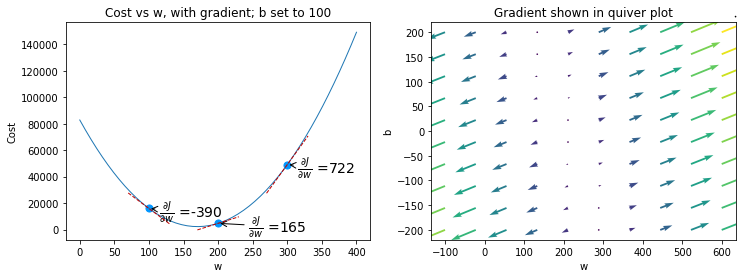

In [25]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [26]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
#     alpha = 0.1
    w = w_in
    b = b_in
    J_history = []
    p_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J_history.append( cost_function(x, y, w, b))
        p_history.append([w,b])
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

In [27]:
w_init = 0
b_init = 0
alpha = 1.0e-2

w_final, b_final, J_history, p_history = gradient_descent(x_train,y_train, w_init, b_init, alpha, 10000, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.09e+05  dj_dw: -1.170e+03, dj_db: -4.700e+02   w:  1.170e+01, b: 4.70000e+00
Iteration 1000: Cost 1.78e+03  dj_dw: -1.060e+00, dj_db:  2.599e+00   w:  1.974e+02, b: 3.16325e+01
Iteration 2000: Cost 1.74e+03  dj_dw: -4.357e-01, dj_db:  1.068e+00   w:  2.045e+02, b: 1.44256e+01
Iteration 3000: Cost 1.74e+03  dj_dw: -1.790e-01, dj_db:  4.388e-01   w:  2.074e+02, b: 7.35495e+00
Iteration 4000: Cost 1.74e+03  dj_dw: -7.357e-02, dj_db:  1.803e-01   w:  2.085e+02, b: 4.44950e+00
Iteration 5000: Cost 1.74e+03  dj_dw: -3.023e-02, dj_db:  7.410e-02   w:  2.090e+02, b: 3.25559e+00
Iteration 6000: Cost 1.74e+03  dj_dw: -1.242e-02, dj_db:  3.045e-02   w:  2.092e+02, b: 2.76500e+00
Iteration 7000: Cost 1.74e+03  dj_dw: -5.104e-03, dj_db:  1.251e-02   w:  2.093e+02, b: 2.56340e+00
Iteration 8000: Cost 1.74e+03  dj_dw: -2.097e-03, dj_db:  5.141e-03   w:  2.093e+02, b: 2.48056e+00
Iteration 9000: Cost 1.74e+03  dj_dw: -8.619e-04, dj_db:  2.113e-03   w:  2.094e+02, b: 2.44652e+00


In [28]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 211.8 Thousand dollars
1200 sqft house prediction 253.7 Thousand dollars
2000 sqft house prediction 421.2 Thousand dollars
